<a href="https://colab.research.google.com/github/Aaaron1995/opencv_class2022/blob/main/class1012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python 
!pip install opencv-contrib-python
!pip install numpy
!pip install Pillow


In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow


img = cv2.imread("DSCF6491.JPG", 1)
img_2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# print(img.shape)
# print(img_2.shape)
# print(img_3.shape)


cv2.imwrite("D1.jpg", img_2, [cv2.IMWRITE_JPEG_QUALITY, 50])

#讀取練習

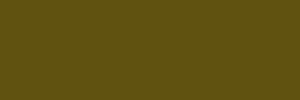

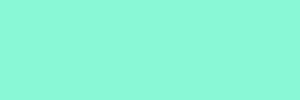

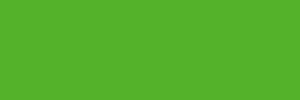

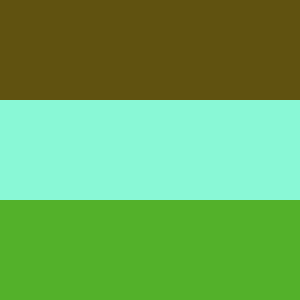

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import random

r_color = [(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for i in range(0,3)]

# img = np.full((100, 300, 3), (random.randint(0,255),random.randint(0,255), 255), np.uint8)
# img2 = np.full((100, 300, 3), (random.randint(0,255), 255, random.randint(0,255)), np.uint8)
# img3 = np.full((100, 300, 3), (255, random.randint(0,255), random.randint(0,255)), np.uint8)

imgL = [np.full((100, 300, 3), r_color[i], np.uint8) for i in range(0,3)]

#畫圖指令
# a,b=0,0
# for i in imgL:
#   cv2.line(i,(a,b),(a+100,b+100),(255,255,255),2)
#   a+=100

# a,b=0,0
# for i in imgL:
#   cv2.rectangle(i,(a,b),(a+100,b+100),(255,255,255),2)
#   a+=100

# for i in imgL:
#   cv2.circle(i,(0,0),100,(255,255,255),2)

img = np.concatenate(imgL)

for i in imgL:
  cv2_imshow(i)

cv2_imshow(img)

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import random
from PIL import ImageFont, ImageDraw, Image

img = Image.fromarray(imgL[0])
a = 0
for i in range(0,5):
  ImageDraw.Draw(img).text(
      (20-a,50-a),
      "我的額頭會發出圓圈",
      (int(r_color[1][0]*i/5),int(r_color[1][1]*i/5),int(r_color[1][2]*i/5)),
      ImageFont.truetype("HanyiSentyChalk 2018.ttf", 30)
  )
  a+=5

imgL[0] = np.array(img)

cv2_imshow(imgL[0])

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

video_1 = cv2.VideoWriter(
    "1.mp4",
    cv2.VideoWriter_fourcc(*'MP4V'),
    120,
    (500,300)
)

img = np.full((300, 500, 3), (255,255,255), np.uint8)
a = 0
while a < 4:
  for i in range(0,400):
    dp.clear_output(True)
    img = np.full((300, 500, 3), (255,255,255), np.uint8)
    cv2.rectangle(img,(0+i,100),(100+i,200),(25,200,255),-1)
    video_1.write(img)
    # dp.clear_output(False)
    # cv2_imshow(img)
    # time.sleep(0.1)
  for i in range(0,400):
    dp.clear_output(True)
    img = np.full((300, 500, 3), (255,255,255), np.uint8)
    cv2.rectangle(img,(400-i,100),(500-i,200),(25,200,255),-1)
    video_1.write(img)
    # dp.clear_output(False)
    # cv2_imshow(img)
    # time.sleep(0.1)
  a+=1
video_1.release()

In [ ]:
!ffmpeg -i 1.mp4 -vcodec libx264 2.mp4 #轉換檔案類型

In [ ]:
import base64
import codecs
import IPython.display as dp

with codecs.open("2.mp4","rb") as f:
  D = base64.b64encode(f.read()).decode()

dp.HTML(
  f'<video src="data:video/mp4;base64,{D}" controls />'
)
#讀入後寫入
#用網頁開啟影片檔

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

vedio = cv2.VideoCapture("1.mp4")

print(f"寬：{vedio.get(3)}")#功能參數3=寬 
print(f"高：{vedio.get(4)}")#功能參數4=高
print(f"每秒影格數：{vedio.get(5)}")#5=每秒影格
print(f"影片總影格：{vedio.get(7)}")#7=影片總影格
vedio.set(1,3000)#設定set當前影格(1)從3000開始
while vedio.isOpened() == True:
  ret,m_1 = vedio.read()#會回傳布林值與圖片參數
  print(f"當前影格：{vedio.get(1)}")
  if ret == True:
    cv2_imshow(m_1)
    pass
  else:
    break

#將影片拆分成圖片